# HIV Model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [2]:
def make_state(R0, L0, E0, V0):
    """Makes a state.
    
    R: activated, uninfected CD4 lymphocytes
    L: latently infected cells
    E: actively infected cells
    V: free virions
    
    Returns a state."""
    
    state = State(R=R0,
                L=L0,
                E=E0,
                V=V0)
    return state

In [3]:
def make_system(gamma, mu, tau, beta, ro, alpha, sigma, delta, pi, t0, tend, dt):
    """Makes a system.
    
    Gamma: Rate at whch uninfected CD4 lymphocytes arise
    Mu: HIV-independent death rate of uninfected CD4 lymphocytes
    Tau: Proportion of cells activated
    Beta: Rate of Infection of CD4 lymphocytes per virion
    Ro: Proportion of cells becoming latently infected upon infecton
    Alpha: Activation rate of latently infected cells
    Sigma: Removal rate of cell-free virus
    Delta: Removal (death) rate of actively infected CD4
    Pi: Rate of production of virons by an actively infected cell
    T0: Initial start time
    Tend: Ending time
    dt: Step time
    
    Returns a system."""
        
    system = System(g=gamma,
                   m=mu,
                   t=tau,
                   b=beta,
                   r=ro,
                   a=alpha,
                   s=sigma,
                   d=delta,
                   p=pi,
                   t0=t0,
                   tend=tend,
                   dt=dt)
    return system

In [4]:
def update_function(system, t, state):
     """Updates the function with each time step.
    
    system: system object
    t: time
    state: state object
    
    Returns a state."""
        
    unpack(system)
    drdt = ((g*t)-(m*state.R)-(b*state.R*state.V))                           #change in R
    dldt = ((r*b*state.R*state.V)-(m*state.L)-(a*state.L))                   #change in L
    dedt = (((1-r)*b*state.R*state.V) + (a*state.L) - (d*state.E))           #change in E
    dvdt = ((p*state.E) - (s*state.V))                                       #change in V
    state.R += drdt * dt                                                     #updating R
    state.L += dldt * dt                                                     #updating L
    state.E += dedt * dt                                                     #updating E
    state.V += dvdt * dt                                                     #updating V
    
    return State(R=state.R, L=state.L, E=state.E, V=state.V)

In [5]:
def run_simulation(system, state, update_func):
     """Runs the simulation by updating the function repeatedly and storing the state returned in a frame.
    
    Returns a frame."""
        
    unpack(system)
    frame = TimeFrame(columns = state.index)
    frame.row[0] = state
    
    for t in linrange(system.t0,system.tend):
        frame.row[t+1] = update_func(system, t, frame.row[t])
    return frame

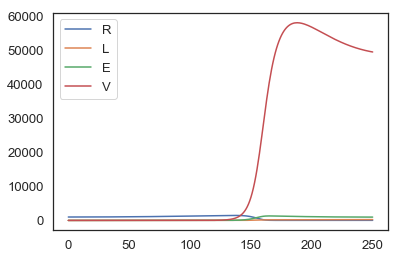

In [8]:
state = make_state(1000, 0,0,(4*10**(-7)))                                                       #making a state
system = make_system(1.36, 0.00136, 0.2, 0.00027, 0.1, 0.036, 2, 0.33, 100, 0, 250, (1/24))      #making a system
results = run_simulation(system, state, update_function)                                         #running the simulation
results.plot()                                                                                   #plotting results